In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)


In [ ]:
from mlxtend.plotting import plot_decision_regions
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
data = pd.read_csv("/content/drive/MyDrive/NLP PROJECT/amazon_reviews.csv")

In [ ]:
data

,Unnamed: 0,reviewerName,overall,reviewText,reviewTime,day_diff,helpful_yes,helpful_no,total_vote,score_pos_neg_diff,score_average_rating,wilson_lower_bound
0,0,NaN,4.0,No issues.,2014-07-23,138,0,0,0,0,0.0,0.0
1,1,0mie,5.0,"Purchased this for my device, it worked as adv...",2013-10-25,409,0,0,0,0,0.0,0.0
2,2,1K3,4.0,it works as expected. I should have sprung for...,2012-12-23,715,0,0,0,0,0.0,0.0
3,3,1m2,5.0,This think has worked out great.Had a diff. br...,2013-11-21,382,0,0,0,0,0.0,0.0
4,4,2&amp;1/2Men,5.0,"Bought it with Retail Packaging, arrived legit...",2013-07-13,513,0,0,0,0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
4910,4910,"ZM ""J""",1.0,I bought this Sandisk 16GB Class 10 to use wit...,2013-07-23,503,0,0,0,0,0.0,0.0
4911,4911,Zo,5.0,Used this for extending the capabilities of my...,2013-08-22,473,0,0,0,0,0.0,0.0
4912,4912,Z S Liske,5.0,Great card that is very fast and reliable. It ...,2014-03-31,252,0,0,0,0,0.0,0.0
4913,4913,Z Taylor,5.0,Good amount of space for the stuff I want to d...,2013-09-16,448,0,0,0,0,0.0,0.0


In [ ]:
data.describe()

,Unnamed: 0,overall,day_diff,helpful_yes,helpful_no,total_vote,score_pos_neg_diff,score_average_rating,wilson_lower_bound
count,4915.000000,4915.000000,4915.000000,4915.000000,4915.000000,4915.000000,4915.000000,4915.000000,4915.000000
mean,2457.000000,4.587589,437.367040,1.311089,0.210376,1.521465,1.100712,0.075468,0.020053
std,1418.982617,0.996845,209.439871,41.619161,4.023296,44.123095,39.367949,0.256062,0.077187
min,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,-130.000000,0.000000,0.000000
25%,1228.500000,5.000000,281.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2457.000000,5.000000,431.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,3685.500000,5.000000,601.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,4914.000000,5.000000,1064.000000,1952.000000,183.000000,2020.000000,1884.000000,1.000000,0.957544


In [ ]:
data.shape

(4915, 12)

In [ ]:
data.dtypes

Unnamed: 0                int64
reviewerName             object
overall                 float64
reviewText               object
reviewTime               object
day_diff                  int64
helpful_yes               int64
helpful_no                int64
total_vote                int64
score_pos_neg_diff        int64
score_average_rating    float64
wilson_lower_bound      float64
dtype: object

<Axes: >

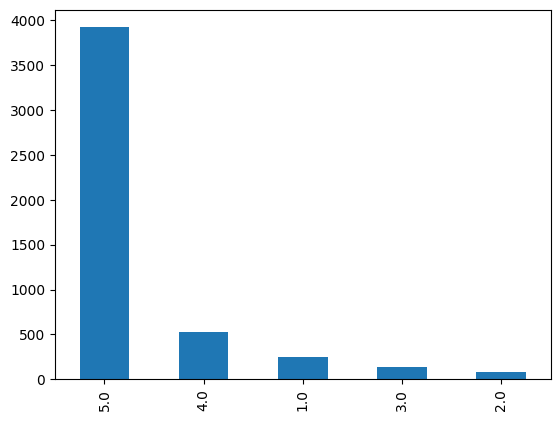

In [ ]:
data.overall.value_counts().plot(kind="bar")


In [ ]:
data["overall"]

0       4.0
1       5.0
2       4.0
3       5.0
4       5.0
       ... 
4910    1.0
4911    5.0
4912    5.0
4913    5.0
4914    5.0
Name: overall, Length: 4915, dtype: float64

In [ ]:
#Creating three categories for reviews : Positive(4-5), Negative(1-2), Neutral(3)
data["review_sentiment"] = pd.cut(
    x=data["overall"],
    bins=[0, 2, 3,np.inf],
    labels=["Negative", "Neutral", "Positive"],)

<Axes: >

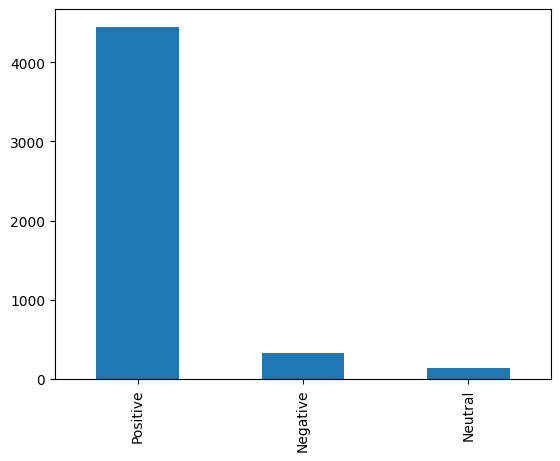

In [ ]:
data.review_sentiment.value_counts().plot(kind="bar")


In [ ]:
data.shape

(4915, 13)

In [ ]:
#Dropping the rows with neutral reviews in order to have a binary classification problem
data.drop(data.loc[data['overall']==3].index, inplace=True)
data.shape
#142 rows got deleted

(4773, 13)

In [ ]:
data.isna().sum()


Unnamed: 0              0
reviewerName            1
overall                 0
reviewText              1
reviewTime              0
day_diff                0
helpful_yes             0
helpful_no              0
total_vote              0
score_pos_neg_diff      0
score_average_rating    0
wilson_lower_bound      0
review_sentiment        0
dtype: int64

In [ ]:
# Dropping rows with null values (2 rows are deleted)
data = data.dropna(axis=0)

In [ ]:
data.isna().sum()

Unnamed: 0              0
reviewerName            0
overall                 0
reviewText              0
reviewTime              0
day_diff                0
helpful_yes             0
helpful_no              0
total_vote              0
score_pos_neg_diff      0
score_average_rating    0
wilson_lower_bound      0
review_sentiment        0
dtype: int64

In [ ]:
# Bag of words model for analysis

from sklearn.feature_extraction.text import CountVectorizer
from nltk.tokenize import RegexpTokenizer
token = RegexpTokenizer(r"[a-zA-Z0-9]+")
cv = CountVectorizer(stop_words="english",ngram_range=(1,1),tokenizer=token.tokenize)
text_counts = cv.fit_transform(data['reviewText'])
text_counts

/usr/local/lib/python3.9/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


<4771x8068 sparse matrix of type '<class 'numpy.int64'>'
	with 102231 stored elements in Compressed Sparse Row format>

In [ ]:
# A sparse matrix is created by CountVectorizor. We are using only unigrams. All stopwords are deleted.
count_array = text_counts.toarray()

df = pd.DataFrame(data=count_array, columns=cv.vocabulary_.keys())
df.head()

,purchased,device,worked,advertised,phone,memory,download,lot,stuff,brainer,...,ditigal,prepard,mobil,stretch,gpad,gpe,fkang,extending,alike,sk
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
#Train test split
from sklearn.model_selection import train_test_split
X_train,X_test, Y_train, Y_test = train_test_split(text_counts,data['review_sentiment'], test_size =0.25, random_state=5)

In [ ]:
Y_test_coded = []
for i in Y_test:
    if i=="Positive":
        Y_test_coded.append(1)
    else:
        Y_test_coded.append(0)

In [ ]:
# Build a Multinomial naive bayes classifier
from sklearn.naive_bayes import MultinomialNB
NB_classifier = MultinomialNB()
NB_classifier.fit(X_train,Y_train)

MultinomialNB()

In [ ]:
#Model Evaluation
from sklearn import metrics
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

print("Confusion Matrix")
matrix = confusion_matrix(Y_test, NB_classifier.predict(X_test))
print(matrix)

# Classification Report
print("\nClassification Report")
report = classification_report(Y_test, NB_classifier.predict(X_test))
print(report)

# Accuracy of the model
accuracy = accuracy_score(Y_test, NB_classifier.predict(X_test))
print('MNB Classifier Accuracy of the model: {:.2f}%'.format(accuracy*100))

Confusion Matrix
[[  51   28]
 [  21 1093]]

Classification Report
              precision    recall  f1-score   support

    Negative       0.71      0.65      0.68        79
    Positive       0.98      0.98      0.98      1114

    accuracy                           0.96      1193
   macro avg       0.84      0.81      0.83      1193
weighted avg       0.96      0.96      0.96      1193

MNB Classifier Accuracy of the model: 95.89%


In [ ]:
# Build a Gaussian naive bayes classifier
from sklearn.naive_bayes import GaussianNB
GNB_classifier = GaussianNB()
GNB_classifier.fit(np.asarray(X_train.todense()),Y_train)

# Model Evaluation
print("Confusion Matrix")
matrix = confusion_matrix(Y_test, GNB_classifier.predict(np.asarray(X_test.todense())))
print(matrix)

# Classification Report
print("\nClassification Report")
report = classification_report(Y_test, GNB_classifier.predict(np.asarray(X_test.todense())))
print(report)

# Accuracy of the model
accuracy = accuracy_score(Y_test, GNB_classifier.predict(np.asarray(X_test.todense())))
print('GNB Classifier Accuracy of the model: {:.2f}%'.format(accuracy*100))


Confusion Matrix
[[ 24  55]
 [304 810]]

Classification Report
              precision    recall  f1-score   support

    Negative       0.07      0.30      0.12        79
    Positive       0.94      0.73      0.82      1114

    accuracy                           0.70      1193
   macro avg       0.50      0.52      0.47      1193
weighted avg       0.88      0.70      0.77      1193

GNB Classifier Accuracy of the model: 69.91%


In [ ]:
#Using TF-IDF vectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer()
text_counts_tfidf = tfidf.fit_transform(data['reviewText'])
text_counts_tfidf

<4771x8316 sparse matrix of type '<class 'numpy.float64'>'
	with 173679 stored elements in Compressed Sparse Row format>

In [ ]:
count_array = text_counts_tfidf.toarray()
df = pd.DataFrame(data=count_array, columns=tfidf.get_feature_names())
df.head()


AttributeError: ignored